Google Drive üzerinden bizlerle paylaşılan 'spectrograms' isimli klasördeki verileri colab'da kullanmak için aşağıdaki kodu çalıştırabiliriz.
Kodun herkes için doğru çalışması amacıyla bizlerle paylaşılan klasör için MyDrive veya Drive'ım altında (Kendi Google Drive'ınızda) bir kısayol oluşturulması lazım. 
* verilen linke tıkla https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog?usp=sharing
* add shortcut diyerek paylaşılan klasör için MyDrive(Drive'ım) altında bir shortcut oluştur (adını 'spectrograms' olarak gir).
* aşağıdaki kodu çalıştır ve ilgili erişim izinlerini ver:

In [ ]:
# kodun çalışmaya başladığını görmek için:
print("hello world!")

# drive'a bağlan
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_path = '/content/drive/MyDrive/spectrograms/'

# şimdi colab'da drive/MyDrive isimli klasörün altında spectragrams klasörünü görebiliriz.

# artık aynı dosyalara erişebiliriz.
import os
os.chdir(data_path)
print(data_path)

hello world!
Mounted at /content/drive
/content/drive/MyDrive/spectrograms/


Kullanılacak kütüphaneleri import edelim.

In [ ]:
# gerekli kütüphaneleri import et
import numpy as np
import matplotlib.pyplot as plt
import cv2

Klasörlerden air_conditioner'a denk gelen '0' klasöründen bir png dosyasını okuyup grayscale'e dönüştürelim.

current path: /content/drive/MyDrive/spectrograms/0


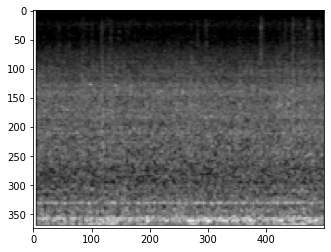

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
shape: (374, 500)


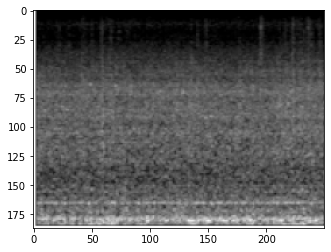

[[255 255 117 ...   0   0   0]
 [255 255 121 ...   0   0   0]
 [255 255 121 ...   0   0   0]
 ...
 [255 255 117 ...  69  70  50]
 [255 255 248 ... 248 248 248]
 [255 255 255 ... 255 255 255]]
shape: (187, 250)
<class 'numpy.ndarray'>


In [ ]:
# ses kategorileri:
CATEGORIES = {"air_conditioner" : 0,
              "car_horn" : 1,
              "children_playing" : 2,
              "dog_bark" : 3,
              "drilling" : 4,
              "engine_idling" : 5,
              "gun_shot" : 6,
              "jackhammer" : 7,
              "siren" : 8,
              "street_music" : 9}

for category in CATEGORIES:
  # her bir kategori için dosya yolunu hazırla
  path = os.path.join(data_path, str(CATEGORIES[category]))
  # hazırlanan dosya yolunu yazdır
  print(f"current path: {path}")

  # ilgili klasör altındaki her bir dosyayı gez. (şimdilik sadece ilk dosyayı okuyacağız. break bunun için)
  for img_path in os.listdir(path):
    # png dosyasını oku ve grayscale'e dönüştür.
    img_array = cv2.imread(os.path.join(path, img_path), cv2.IMREAD_GRAYSCALE)

    # grayscale image'ı görelim:
    plt.imshow(img_array, cmap="gray")
    plt.show()
    # array formunda da görelim ve shape'ini yazdıralım
    print(img_array)
    print(f"shape: {img_array.shape}")

    # image'in size'ını değiştirebiliriz
    new_img_array = cv2.resize(img_array, (250, 187))
    # size'ı değiştirilmişken nasıl göründüğüne bakalım
    plt.imshow(new_img_array, cmap="gray")
    plt.show()
    # array formunda yazdıralım ve shape bilgilerini görelim:
    print(new_img_array)
    print(f"shape: {new_img_array.shape}")

    break # tüm dosyaları şimdilik okumamız gerekmiyor.

  break # tüm klasörleri şimdilik okumayalım.

# img_array'in tipi:
print(type(img_array))

Görsellerin size'ını yarı yarıya küçültebiliriz. Bunun için IMG_SIZE_X ve IMG_SIZE_Y sabitlerini belirleyelim.

In [ ]:
IMG_SIZE_X = 250
IMG_SIZE_Y = 187

Yukarıdaki dosya okuma yöntemini kullanarak tüm dosyaları okuyup training_data adındaki bir listede veriyi tutalım.
Bunun için create_training_data() adında bir fonksiyon yazalım.

In [ ]:
# Her bir img_array ve img_array'in kategorisini liste halinde [img_array, category] training_data içinde tutalım.
training_data = []

# yukarıdaki kodla benzer. sadece tüm dosyaları okuyor.
def create_training_data():
  for category in CATEGORIES:

    path = os.path.join(data_path, str(CATEGORIES[category]))
    print(f"current path: {path}")
    class_num = CATEGORIES[category]

    for img_path in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img_path), cv2.IMREAD_GRAYSCALE)

        img_array = cv2.resize(img_array, (IMG_SIZE_X, IMG_SIZE_Y))
        
        # img_array ve ait olduğu kategoriyi training_data listesine koy:
        training_data.append([img_array, class_num])
      except Exception as e:
        print(e)
   

create_training_data() fonksiyonunu çağır ve training_data listesinde kaç tane eleman var yazdır.

In [ ]:
# fonksiyonu çağır:
create_training_data()
# veriler eklenmiş mi görelim:
print(len(training_data))


current path: /content/drive/MyDrive/spectrograms/0
current path: /content/drive/MyDrive/spectrograms/1
current path: /content/drive/MyDrive/spectrograms/2
current path: /content/drive/MyDrive/spectrograms/3
current path: /content/drive/MyDrive/spectrograms/4
current path: /content/drive/MyDrive/spectrograms/5
current path: /content/drive/MyDrive/spectrograms/6
current path: /content/drive/MyDrive/spectrograms/7
current path: /content/drive/MyDrive/spectrograms/8
current path: /content/drive/MyDrive/spectrograms/9
8732


In [ ]:
# initilize the feature set (X) and label set (y)
X = []
y = []

X ve y listelerini veriyle doldur:

In [ ]:
for features, label in training_data:
  X.append(features)
  y.append(label)

import pandas as pd
from sklearn.preprocessing import minmax_scale

X = np.array(X).reshape(-1, IMG_SIZE_X, IMG_SIZE_Y, 1) # the last 1 is due to grayscale
y = np.array(y)

In [ ]:
# see what happened:
print(f"X[1] is:\n{X[1]} \n and shape of it: {X[1].shape}")

X[1] is:
[[[255]
  [255]
  [117]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 ...

 [[ 92]
  [ 84]
  [ 86]
  ...
  [248]
  [248]
  [248]]

 [[248]
  [248]
  [248]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]] 
 and shape of it: (250, 187, 1)


In [ ]:
# normalize the data by scaling (divide by 255):
X = X/255.0

X_val, X_test, y_val, y_test listelerini oluştur.

In [ ]:
#usage of split
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, random_state=0, test_size=0.6)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, random_state=0, test_size=0.5)
X_train.shape

(3492, 250, 187, 1)

Oluşturulan listeleri drive'a pickle dosyası olarak kaydet. Model oluşturulurken drive'dan bu veriler okunacak.

In [ ]:
# save training data:
import pickle

pickle_out = open("/content/drive/MyDrive/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/X_val.pickle", "wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/y_val.pickle", "wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()
